# Bayesian Model Comparison applied to COVID 19

- Author: Pablo Lemos (Sussex, UCL)
- Work in collaboration with Constantina Nicolaou, Ben Henghes and Ofer Lahav (UCL)

In this notebook, we demonstrate an application of the $\mathtt{cobaya}$ package to COVID 19 data. The package was developed for usage in cosmology, but can be use as a general tool for analysing data in a Bayesian framework. It can efficiently perform calculations such as finding the maximum of a posterior distribution, or sampling through Markov Chain Monte Carlo (MCMC) or Nested Sampling

This notebook was created for a demonstration in the workshop "Where Earth Meets the Sky", and as such it needs to be able to run in a short period of time. Therefore, it only runs a minimizer job with three parameters, and plots some chains that were run before. For more information, or help, please do get in touch! (p.lemos@sussex.ac.uk)

### Theory

All the authors are astrophysicists by training, and as a result we know next to nothing about biology, or how to model a pandemic. Our knowledge is based on what we found from reading papers, but if you spot any mistakes, do let us know!

We attempt to model the COVID 19 pandemic in the UK, through a simple epidemiological model. We use a combination of the SIRD and SIQR models. In our model, the population of the UK is divided between Susceptible, Infected, Recovered, Deceased and Quarantined. These populations evolve following these differential equations: 

\begin{eqnarray}
{dS \over dt} = - {\beta S I \over N} \\
{dI \over dt} = {\beta S I \over N}  - \gamma I - q I - \mu I \\
{dQ \over dt} = q I \\ 
{dR \over dt} = \gamma I + \gamma Q \\
{dD \over dt} = \mu I \\
\end{eqnarray}

Where $\beta, \gamma, \mu, q$ are the rates of infection, recovery, death and quarantine respectively. 

### Required packages

- Numpy
- Matplotlib
- Pandas
- Scipy
- Cobaya (https://cobaya.readthedocs.io/en/latest/)
- GetDist (https://getdist.readthedocs.io/en/latest/)

In [1]:
%matplotlib inline
import sys
import numpy as np
from matplotlib import pyplot as plt

# To read the data
import pandas

# To integrate the SIR equations
from scipy.integrate import odeint

# To sample the posterior distribution
from cobaya.run import run
from cobaya.likelihood import Likelihood

# To plot the posterior distributions
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

# Load the Covid module (will find a better way to do this)
sys.path.insert(0, '../')
from SIR_model import *

Visualize the data

Text(0.5, 0, 'Days')

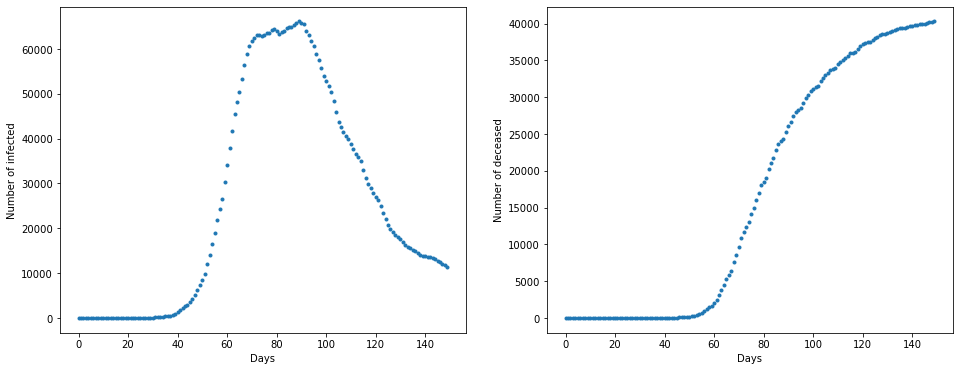

In [2]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (16, 6))
ax1.plot(I_data, '.')
ax1.set_ylabel('Number of infected')
ax1.set_xlabel('Days')

ax2.plot(D_data, '.')
ax2.set_ylabel('Number of deceased')
ax2.set_xlabel('Days')

Now, we are going to use cobaya. For this, we are going to create a dictionary containing all necessary information.

First, tell cobaya what likelihood function we are using:

In [3]:
info = {"likelihood": {"covid": logp_SIR}}

For speed, I will set no quarantine (q = 0). The other parameters are run in log scale, i.e. the parameters are $\log \beta$, $\log \gamma$, $\log \mu$

In [4]:
info["params"] = {
    "lbeta": {"prior": {"min": -10, "max": 5}, "ref": -1.2},
    "lmu": {"prior": {"min": -10, "max": 0}, "ref": -5},
    "lgamma": {"prior": {"min": -10, "max": 5}, "ref": -1.2},
    "q": {"value": 0.},
}

I make $\beta, \gamma, \mu$ derived parameters, so without sampling them I also get information on them

In [5]:
info["params"]["beta"] = {"derived": lambda lbeta: np.exp(lbeta), "latex": r"\beta"}
info["params"]["mu"] = {"derived": lambda lmu: np.exp(lmu), "latex": r"\mu"}
info["params"]["gamma"] = {"derived": lambda lgamma: np.exp(lgamma), "latex": r"\gamma"}

I use the minimizer as my sampler. For a more complex sampler, I can use "mcmc" or "polychord"

In [6]:
info["sampler"] =  {"minimize": None}

In [7]:
updated_info, sampler = run(info)

[covid] Initialized external likelihood.
[minimize] Initializing
[minimize] Starting from random initial point:
[minimize] {'lbeta': -1.2, 'lmu': -5.0, 'lgamma': -1.2}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[minimize] Starting minimization.
[root] Function eval 1 at point 1 has f = 61140374.6289272 at x = [0. 0. 0.]
[root] Initialising (coordinate directions)
[root] Function eval 2 at point 2 has f = 142053803.036365 at x = [0.1 0.  0. ]
[root] Function eval 3 at point 3 has f = 61489854.8532739 at x = [0.  0.1 0. ]
[root] Function eval 4 at point 4 has f = 76425634.903222 at x = [0.  0.  0.1]
[root] Function eval 5 at point 5 has f = 75966174.404734 at x = [-0.1  0.   0. ]
[root] Function eval 6 at point 6 has f = 61054128.2912464 at x = [ 0.  -0.1  0. ]
[root] Function eval 7 at point 7 has f = 46040421.348461 at x = [ 0.   0.  -0.1]
[root] Beginning main loop
[root] Function eval 8 at point 8 has f = 3300531

[root] Function eval 68 at point 68 has f = 49451218.5286502 at x = [0.33914809 0.31780615 0.28811828]
[root] Slow iteration (3 consecutive so far, max allowed 60)
[root] Function eval 69 at point 69 has f = 87117631.5130449 at x = [0.32000939 0.19326924 0.24522447]
[root] New rho = 0.05 after 69 function evaluations
[root] Function eval 70 at point 70 has f = 41546264.0706135 at x = [0.37206452 0.35955608 0.3281477 ]
[root] Slow iteration (4 consecutive so far, max allowed 60)
[root] Soft restart [currently, f = 4.15463e+07 after 70 function evals]
[root] Function eval 71 at point 71 has f = 209240644.100849 at x = [0.49231167 0.28772975 0.2855157 ]
[root] Function eval 72 at point 72 has f = 37369807.7299068 at x = [0.45805048 0.25320268 0.42360966]
[root] Function eval 73 at point 73 has f = 34964623.13579 at x = [0.50457642 0.12470224 0.47613452]
[root] Function eval 74 at point 74 has f = 77952393.118113 at x = [0.45078889 0.03160858 0.37675464]
[root] New rho = 0.05 after 74 func

[root] Function eval 133 at point 133 has f = 52211791.2359322 at x = [1.43182867 0.72179905 1.17990974]
[root] New rho = 0.05 after 133 function evaluations
[root] Function eval 134 at point 134 has f = 76425854.9323381 at x = [1.23254947 0.78873673 1.24675493]
[root] Function eval 135 at point 135 has f = 49560801.8961675 at x = [1.34951102 0.88582634 1.26820083]
[root] Soft restart [currently, f = 4.86566e+07 after 135 function evals]
[root] Function eval 136 at point 136 has f = 76425854.9323381 at x = [1.14000897 0.95703208 1.43182867]
[root] Function eval 137 at point 137 has f = 76425854.9323381 at x = [1.12042053 1.1920118  1.43182867]
[root] Function eval 138 at point 138 has f = 76425854.9323381 at x = [1.09060445 0.75533774 1.32012477]
[root] Function eval 139 at point 139 has f = 76425854.9323381 at x = [0.92722528 0.99089888 1.33604081]
[root] New rho = 0.05 after 139 function evaluations
[root] Function eval 140 at point 140 has f = 76425854.9323381 at x = [1.16539872 0.9

[root] Function eval 198 at point 198 has f = 124674237.309054 at x = [1.43182867 1.34653623 1.10494152]
[root] Function eval 199 at point 199 has f = 48921934.4517461 at x = [1.43182867 0.94389467 1.41048443]
[root] Function eval 200 at point 200 has f = 76425854.9323381 at x = [0.99481548 0.69083223 1.43182867]
[root] Function eval 201 at point 201 has f = 49667905.1133041 at x = [1.32288346 0.53297949 1.13706835]
[root] New rho = 0.05 after 201 function evaluations
[root] Function eval 202 at point 202 has f = 76425854.9323381 at x = [1.22713528 0.96832839 1.2642901 ]
[root] Function eval 203 at point 203 has f = 68890536.3047357 at x = [1.43182867 0.85820766 1.43182867]
[root] Function eval 204 at point 204 has f = 50317933.4892812 at x = [1.43182867 1.05279553 1.34639155]
[root] Function eval 205 at point 205 has f = 76425854.9323381 at x = [1.39869065 0.97465659 1.43182867]
[root] Function eval 206 at point 206 has f = 48558593.0639947 at x = [1.43182867 0.93175304 1.36198102]
[r

## Comparison of different models

We now compare the following models: 

- No quarantine
- A single quarantine
- Three quarantine (following the timeline of when they really happened) modelled as step functions, all with the same height
- Same, but modelled as Gaussians, all of the same height

- No  quarantine:  -1595431.59205665
- SIQR: -1595432.1255999 
- Global quarantine: -127571.339892049

| - | No quarantine | SIQR quarantine | Global quarantine | 
| --- | --- | --- | --- | 
| log R | 0.0 | -0.53 | 1e7 | 

In [8]:
from getdist.mcsamples import loadMCSamples
import getdist.plots as gdplt

Load the chains

In [9]:
gdsamples_1 = loadMCSamples('../chains/simple', settings={'smooth_scale_2D':0.6, 'smooth_scale_1D':0.5})
gdsamples_2 = loadMCSamples('../chains/quarantine_simple', settings={'smooth_scale_2D':0.6, 'smooth_scale_1D':0.5})
gdsamples_3 = loadMCSamples('../chains/quarantine_global', settings={'smooth_scale_2D':0.6, 'smooth_scale_1D':0.5})

Get the best fit for each

In [10]:
bestfit1 = gdsamples_1.getParamBestFitDict(best_sample=True)
bestfit2 = gdsamples_2.getParamBestFitDict(best_sample=True)
bestfit3 = gdsamples_3.getParamBestFitDict(best_sample=True)

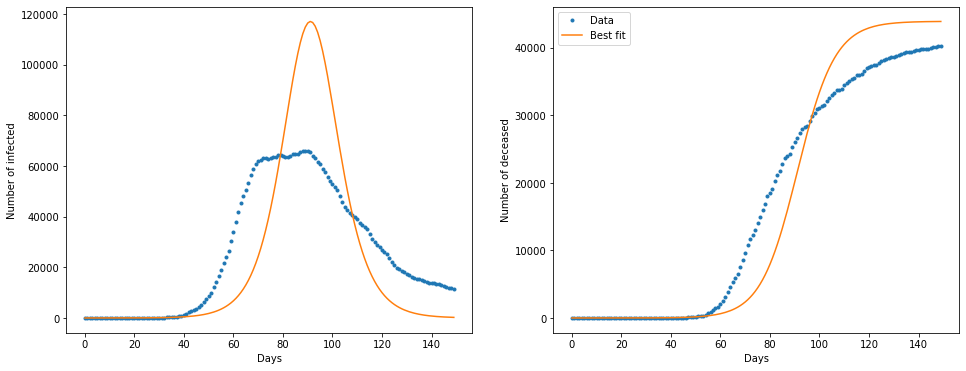

In [17]:
beta_bf = bestfit1['beta']
gamma_bf = bestfit1['gamma']
mu_bf = bestfit1['mu']
S_bf, I_bf, Q_bf, R_bf, D_bf = integrate_SIR(S0, I0, Q0, R0, D0, ndays, beta_bf, gamma_bf, q=0, mu=mu_bf)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (16, 6))
ax1.plot(I_data, '.')
ax1.plot(I_bf)
ax1.set_ylabel('Number of infected')
ax1.set_xlabel('Days')

ax2.plot(D_data, '.', label = 'Data')
ax2.plot(D_bf, label = 'Best fit')
ax2.set_ylabel('Number of deceased')
ax2.set_xlabel('Days')
plt.legend()

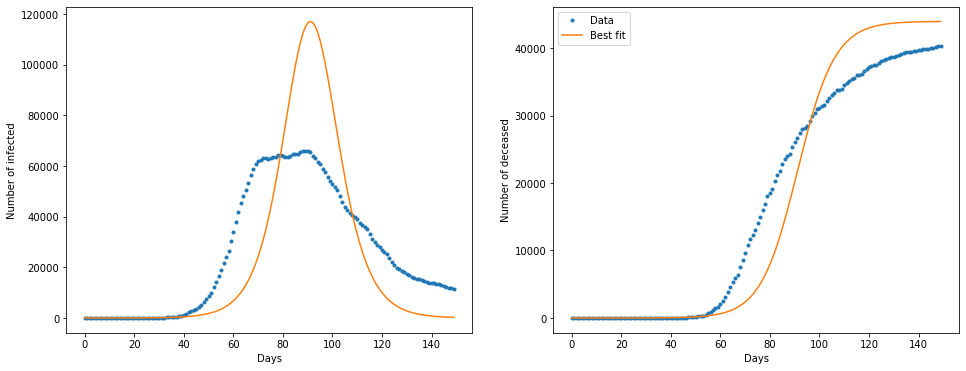

In [18]:
beta_bf = bestfit2['beta']
gamma_bf = bestfit2['gamma']
mu_bf = bestfit2['mu']
q_bf = bestfit2['q']
S_bf, I_bf, Q_bf, R_bf, D_bf = integrate_SIR(S0, I0, Q0, R0, D0, ndays, beta_bf, gamma_bf, q_bf, mu_bf)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (16, 6))
ax1.plot(I_data, '.')
ax1.plot(I_bf)
ax1.set_ylabel('Number of infected')
ax1.set_xlabel('Days')

ax2.plot(D_data, '.', label = 'Data')
ax2.plot(D_bf, label = 'Best fit')
ax2.set_ylabel('Number of deceased')
ax2.set_xlabel('Days')
plt.legend()

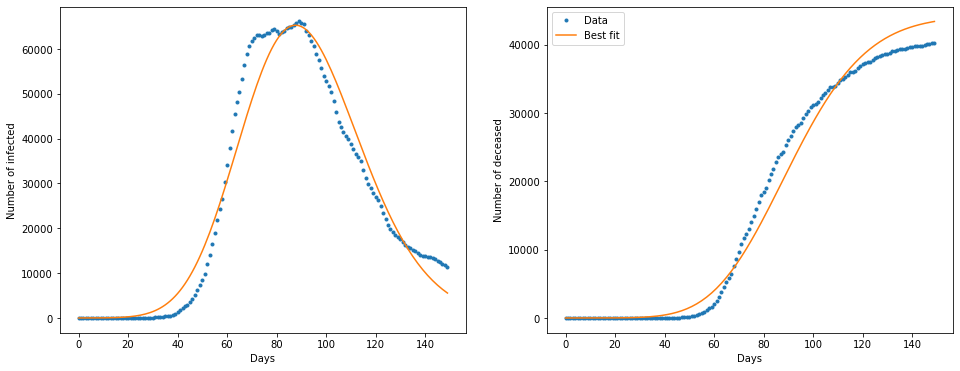

In [19]:
beta_bf = bestfit3['beta']
gamma_bf = bestfit3['gamma']
mu_bf = bestfit3['mu']
q_bf = bestfit3['q']
S_bf, I_bf, Q_bf, R_bf, D_bf = integrate_SIR(S0, I0, Q0, R0, D0, ndays, beta_bf, gamma_bf, q_bf, mu_bf, model='global')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (16, 6))
ax1.plot(I_data, '.')
ax1.plot(I_bf)
ax1.set_ylabel('Number of infected')
ax1.set_xlabel('Days')

ax2.plot(D_data, '.', label = 'Data')
ax2.plot(D_bf, label = 'Best fit')
ax2.set_ylabel('Number of deceased')
ax2.set_xlabel('Days')
plt.legend()

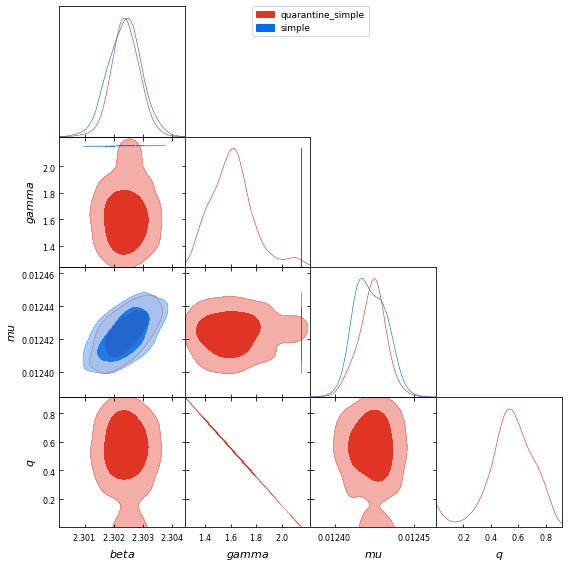

In [23]:
import getdist.plots as gdplt

g = gdplt.get_subplot_plotter()
g.triangle_plot([gdsamples_2, gdsamples_1], ['beta', 'gamma', 'mu','q'], filled=True)

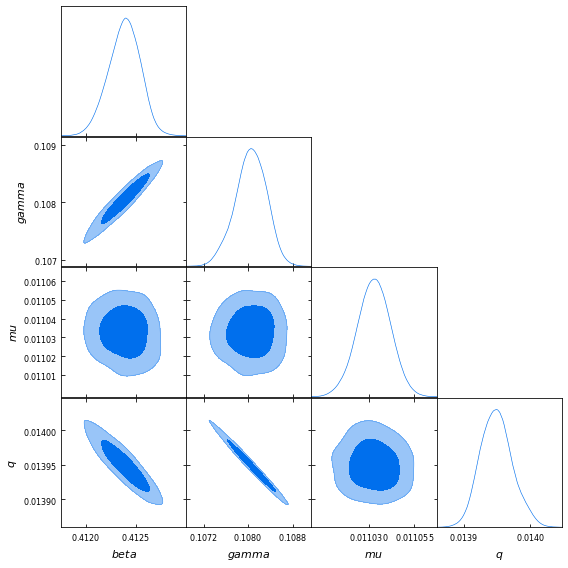

In [25]:
g = gdplt.get_subplot_plotter()
g.triangle_plot([gdsamples_3], ['beta', 'gamma', 'mu','q'], filled=True)